# Plot Trajectories
This is script will create a sample plot of trajectories calculated from "backwards_trajectories.ipynb". It contains two subplots: trajectories in the x-y and x-z plane.  

# Load Modules

In [71]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection

# Read in Trajectory Data

In [72]:
xpos = np.load('trajectory_arrays/xpos_0000m_tug.npy')
ypos = np.load('trajectory_arrays/ypos_0000m_tug.npy')
zpos = np.load('trajectory_arrays/zpos_0000m_tug.npy')
variable1 = np.load('trajectory_arrays/th_0000m_tug.npy')

# Read in Model Data for Domain Info

In [73]:
#Read in model data
ds = xr.open_dataset('/uufs/chpc.utah.edu/common/home/steenburgh-group8/tom/cm1/output/12ms_0000m_tug.nc', chunks={'nk': 1})
#Horizontal resolution of model output (meters)
hor_resolution = (ds.xf[1].values-ds.xf[0].values)*1000

#Get surface height grid (set to zero if no terrain)
try:
    zs = np.array(ds.zs[0,:,:])
except:
    zs = np.zeros((ds.ny, ds.nx))  

# Model Info

In [74]:
#Plot Dimensions
top = 41
left = 0

ymid = np.int(ds.ny/2)
x1d = ds.xh[left:].values
y1d = ds.yh.values
x2d = np.rot90(np.repeat(x1d,top, axis = 0).reshape(ds.nx-left,top))
y2d = np.rot90(np.repeat(y1d,top, axis = 0).reshape(ds.ny-left,top))
z2dxz = np.repeat(ds.z[:top].values*1000,ds.nx-left, axis = 0).reshape(top, ds.nx-left)
z2dyz = np.repeat(ds.z[:top].values*1000,ds.ny-left, axis = 0).reshape(top, ds.ny-left)
#y2d_500 = dsj500.zh[0,:top,ymid,left:].values*z_scale
#y2d_2000 = dsj2000.zh[0,:top,ymid,left:].values*z_scale

#Model output
time = 400

qcxy = ds.qc[time,:top,:,:]
qrxy = ds.qr[time,:top,:,:]
qixy = ds.qi[time,:top,:,:]
qgxy = ds.qg[time,:top,:,:]
qsxy = ds.qs[time,:top,:,:]
#Total
qxy  = (qcxy + qrxy + qixy + qgxy + qsxy).max(dim = ('nk')).values*1000
#qxy  = ds.th[time,2,:,:].values

qcxz = ds.qc[time,:top,:,:]
qrxz = ds.qr[time,:top,:,:]
qixz = ds.qi[time,:top,:,:]
qgxz = ds.qg[time,:top,:,:]
qsxz = ds.qs[time,:top,:,:]
#Total
qxz  = (qcxz + qrxz + qixz + qgxz + qsxz).max(dim = ('nj')).values*1000
#qxz  = ds.th[time,:top,ymid,:].values


qcyz = ds.qc[time,:top,:,:]
qryz = ds.qr[time,:top,:,:]
qiyz = ds.qi[time,:top,:,:]
qgyz = ds.qg[time,:top,:,:]
qsyz = ds.qs[time,:top,:,:]
#Total
qyz  = (qcyz + qryz + qiyz + qgyz + qsyz).max(dim = ('ni')).values*1000
#qyz  = ds.th[time,:top,:,2800].values


# Plot Trajectories

/uufs/chpc.utah.edu/common/home/u1013082/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1316: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= b] = i
/uufs/chpc.utah.edu/common/home/u1013082/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1320: RuntimeWarning: invalid value encountered in less
  iret[xx < self.vmin] = -1
/uufs/chpc.utah.edu/common/home/u1013082/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1321: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= self.vmax] = max_col


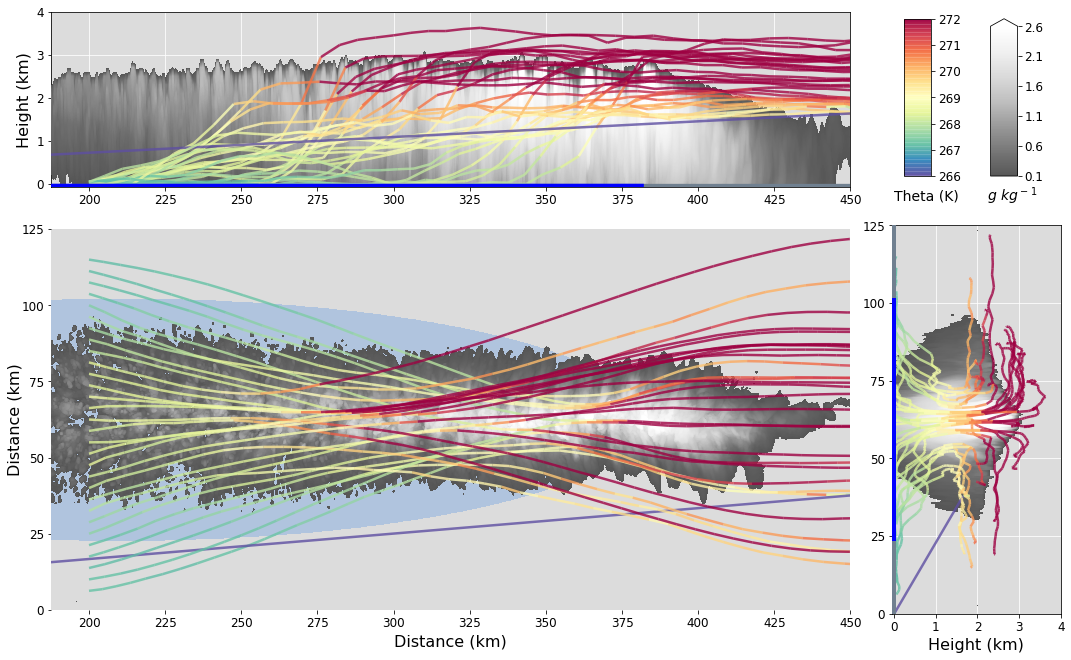

In [75]:
###############################################################################
############################ Trajectory Plot  #################################
###############################################################################

%matplotlib inline
fig = plt.figure(figsize=(15,9.5), facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.985, top=0.98, wspace=0.655, hspace=0.555)

#Color range of Varible1 (set by user)
xlmin = 266
xlmax = 272.01
xlevels = np.arange(xlmin,xlmax, 0.05)
xlevels_ticks = np.arange(xlmin,xlmax,1)
xlevels_ticks_labels = np.arange(xlmin,xlmax, 1).astype(int)

#Levels for qc
lmin = 0.1
lmax = 2.601
levels = (np.arange(lmin,lmax, 0.01))
levels_ticks = np.arange(lmin,lmax,0.5)
levels_ticks_labels = np.round(levels_ticks, 1)

#Levels for th
# lmin = 265
# lmax = 270
# levels = (np.arange(lmin,lmax, 1))
# levels_ticks = levels
# levels_ticks_labels = np.round(levels_ticks, 1)

#Colormaps
cmap = cm.Spectral_r
cmapf = cm.Greys_r

#Dimensions
left = 1500

############  Functions for coloring lines with third variable ################

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

# Interface to LineCollection:

def colorline(x, y, z=None, cmap = cm.Spectral_r, norm=matplotlib.colors.BoundaryNorm(xlevels,cmap.N), linewidth=2, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))     
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z]) 
    z = np.asarray(z)
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha, zorder = 3)
    ax = plt.gca()
    ax.add_collection(lc)
    return lc

###################  Plot Trajectories in x-y plane ###############################

#Create Plot
ax = plt.subplot2grid((6, 10), (2, 0), rowspan=4, colspan = 8, aspect = 'equal')


#Plot cloud
plot = plt.contourf(qxy, levels, cmap = cmapf, extend = 'max', alpha = 1,  zorder = 3, vmin = -0.8)

#Plot trajectories in x-y plane, colored by Variable1
#Plots trjectory with highest mean z first, then scond, then third...
zpos_seg = np.nanmean(zpos[:,:,:], axis = 0)
zord = np.argsort(zpos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = zord[i, j]
        trajectories_xy = colorline(xpos[:,i,ind], ypos[:,i,ind], variable1[:,i,ind], cmap, alpha = 0.8, linewidth = 2.5)

#Ticks and labels (set by user)
xticks = np.arange(0,ds.nx+1,200)
yticks = np.arange(0,ds.ny+1,200)
plt.xticks(xticks)
plt.yticks(yticks)
xtickslabs = (xticks*hor_resolution/1000).astype(int) #kilometers
ytickslabs = (yticks*hor_resolution/1000).astype(int) #kilometers
ax.set_xticklabels((xtickslabs), fontsize = 12)
ax.set_yticklabels((ytickslabs), fontsize = 12)
plt.ylabel('Distance (km)', fontsize = 16, labelpad = -1)
plt.xlabel('Distance (km)', fontsize = 16)

#Limits and characteristics (set by user)
plt.xlim(left,ds.nx)
plt.ylim(0,ds.ny)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#Plot water and land (set by user)
levels_water = [1.5, 2.5]
levels_terrain = [0,1.5]
xland_plt = plt.contourf(ds.xland[0,:,:], levels_water, alpha = 1, colors = ('lightsteelblue'), zorder = 2)
xland_plt = plt.contourf(ds.xland[0,:,:], levels_terrain, alpha = 1, colors = ('gainsboro'), zorder = 1)

#Terrain (set by user)
#terrain_levels = np.arange(-1, 2000.1, 100)
#terrain = plt.contourf(zs[:,:], terrain_levels, alpha = 1, cmap = cm.Greys, vmin = -600, vmax = 2000, zorder = 1)



###################  Plot Trajectories in x-z plane ###############################

#Create subplot
ax = plt.subplot2grid((6, 10), (0, 0), rowspan=2, colspan = 8)

#Plot cloud
plot_q = plt.contourf((x2d-x2d[0,0])*1000/125, z2dxz-50, qxz, levels, cmap = cmapf, extend = 'max', alpha = 1,  zorder = 3, vmin = -0.8)

#Plot trajectories in x-y plane, colored by Variable1
#Plots trjectory with lowest mean y first, then scond, then third...
ypos_seg = np.nanmean(ypos[:,:,:], axis = 0)
yord = np.argsort(ypos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = yord[-i, -j]
        trajectories_xz = colorline(xpos[:,i,ind], zpos[:,i,ind], variable1[:,i,ind], cmap, alpha = 0.8, linewidth = 2.5)

#Ticks and labels (set by user)
xticks = np.arange(0,ds.nx+1,200)
yticks = np.arange(0,4001,1000)
plt.xticks(xticks)
plt.yticks(yticks)
xtickslabs = (xticks*hor_resolution/1000).astype(int) #kilometers
ytickslabs = (yticks/1000).astype(int) #km
ax.set_xticklabels((xtickslabs), fontsize = 12)
ax.set_yticklabels((ytickslabs), fontsize = 12)
plt.ylabel('Height (km)', fontsize = 16)

#Limits and characteristics (set by user)
plt.xlim(left,ds.nx)
plt.ylim([-70,yticks[-1]])
plt.axvspan(0,ds.nx,color='gainsboro',lw=0)
plt.grid(True, color = 'white')

#Plot Terrain (set by user)
x1d = np.arange(0,ds.nx,1)
ymid = np.int(ds.ny/2)
terrain = plt.plot(x1d, zs[ymid,:]-40, c = 'slategrey', linewidth = 4, zorder = 4)

#Plot Lake (set by user)
lake = np.array(ds.xland[0,ymid,:])
lake[lake == 1] = np.nan
lake_plt = plt.plot(x1d, lake-40, c = 'blue', linewidth = 4, zorder = 5)



###################  Plot Trajectories in y-z plane ###############################

#Create subplot
ax = plt.subplot2grid((6, 10), (2, 8), rowspan=4, colspan = 2)



#To make same lengtho as x-z plot
scale = 3.6

plot = plt.contourf(np.rot90(z2dyz,3)-50, np.rot90((y2d-y2d[0,0])*1000/125,3), np.rot90(qyz,3), levels, cmap = cmapf, extend = 'max', alpha = 1,  zorder = 3, vmin = -0.8)

#Plots trjectory with lowest mean x first, then scond, then third...
xpos_seg = np.nanmean(xpos[:,:,:], axis = 0)
xord = np.argsort(xpos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = xord[-i, -j]
        trajectories_xz = colorline(zpos[:,i,ind], ypos[:,i,ind], variable1[:,i,ind], cmap, alpha = 0.8, linewidth = 2.5)

#Ticks and labels (set by user)
yticks = np.arange(0,ds.ny+1,200)
xticks = np.arange(0,4001,1000)
plt.yticks(yticks)
plt.xticks(xticks)
ytickslabs = (yticks*hor_resolution/1000).astype(int) #kilometers
xtickslabs = (xticks/1000).astype(int) #km
ax.set_yticklabels((ytickslabs), fontsize = 12)
ax.set_xticklabels((xtickslabs), fontsize = 12)
plt.xlabel('Height (km)', fontsize = 16)

#Limits and characteristics (set by user)
plt.ylim(0,ds.ny)
plt.xlim(-50,4000)
plt.axvspan(0,4000,color='gainsboro',lw=0)
plt.grid(True, color = 'white')


#Plot Lake (set by user)
y1d = np.arange(0,ds.ny,1)
lake = np.array(ds.xland[0,:,2000])
lake[lake == 1] = np.nan
lake_plt = plt.plot(lake-15, y1d, c = 'blue', linewidth = 4, zorder = 5)

#Plot Terrain (set by user)
y1d = np.arange(0,ds.ny,1)
terrain = plt.plot(zs[:,2000]-15, y1d, c = 'slategrey', linewidth = 4, zorder = 4)


#Colorbar
cbaxes = fig.add_axes([0.84, 0.74, 0.025, 0.23])
cbar = plt.colorbar(trajectories_xz, orientation='vertical', cax = cbaxes, ticks = xlevels_ticks)
cbar.ax.set_yticklabels(xlevels_ticks_labels)
cbar.ax.tick_params(labelsize=12)
plt.text(0.82,-0.13, 'Theta (K)', fontsize = 14, ha='center', va='center')

#Colorbar
cbaxes = fig.add_axes([0.92, 0.74, 0.025, 0.23])
cbar = plt.colorbar(plot_q, orientation='vertical', cax = cbaxes, ticks = levels_ticks)
cbar.ax.set_yticklabels(levels_ticks_labels)
cbar.ax.tick_params(labelsize=12)
plt.text(0.82,-0.13, '$g$ $kg^-$$^1$', fontsize = 14, ha='center', va='center')


#Save
plt.savefig("/uufs/chpc.utah.edu/common/home/u1013082/public_html/phd_plots/cm1/plots/trajectory_plot_0000m_tug_forward.png", dpi = 300)